In [1]:
! pip install tensorflow

In [2]:
! pip install keras

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV,KFold

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [6]:
forest=pd.read_csv("C:\\Users\\Rahul\\Downloads\\forestfires.csv")
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


### we do not require month and day columns,so dropping that

In [7]:
forest_data=forest.drop(['month','day','dayfri','daymon','daysat','daysun','daythu','daytue','daywed','monthapr','monthaug','monthdec','monthfeb','monthjan','monthjul','monthjun','monthmar','monthmay','monthnov','monthoct','monthsep'],axis=1)

In [8]:
forest_data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
encoded=labelencoder.fit_transform(forest_data['size_category'])
forest_data['size_category']=pd.DataFrame(encoded)

In [10]:
forest_data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


## Data understanding

In [11]:
forest_data.shape

(517, 10)

In [12]:
forest_data.isna().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [13]:
forest_data.dtypes

FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
size_category      int32
dtype: object

## Scaling down the data

In [14]:
from sklearn.preprocessing import MinMaxScaler
minmaxscalar=MinMaxScaler()
encoded=minmaxscalar.fit_transform(forest_data)
forest_data_scaled=pd.DataFrame(encoded,columns=forest_data.columns)

In [15]:
forest_data_scaled

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000,1.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000,1.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000,1.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000,1.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904,0.0
513,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769,0.0
514,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231,0.0
515,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000,1.0


## Splitting the input and output

In [16]:
X=forest_data_scaled.drop('size_category',axis=1)
Y=forest_data_scaled[['size_category']]

In [17]:
X.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0


In [18]:
Y.head()

,size_category
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


# Model Building

In [19]:
model = Sequential()
model.add(Dense(50, input_dim=9, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                500       
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 1,801
Trainable params: 1,801
Non-trainable params: 0
_________________________________________________________________


In [20]:
history=model.fit(X,Y,validation_split=0.25,epochs=100,batch_size=10)

Epoch 1/100
39/39 [==============================] - 1s 6ms/step - loss: 0.6483 - accuracy: 0.7106 - val_loss: 0.6167 - val_accuracy: 0.7000
Epoch 2/100
39/39 [==============================] - 0s 2ms/step - loss: 0.5784 - accuracy: 0.7416 - val_loss: 0.6169 - val_accuracy: 0.7000
Epoch 3/100
39/39 [==============================] - 0s 2ms/step - loss: 0.5747 - accuracy: 0.7416 - val_loss: 0.6150 - val_accuracy: 0.7000
Epoch 4/100
39/39 [==============================] - 0s 2ms/step - loss: 0.5721 - accuracy: 0.7416 - val_loss: 0.6174 - val_accuracy: 0.7000
Epoch 5/100
39/39 [==============================] - 0s 2ms/step - loss: 0.5700 - accuracy: 0.7416 - val_loss: 0.6126 - val_accuracy: 0.7000
Epoch 6/100
39/39 [==============================] - 0s 3ms/step - loss: 0.5670 - accuracy: 0.7416 - val_loss: 0.6128 - val_accuracy: 0.7000
Epoch 7/100
39/39 [==============================] - 0s 3ms/step - loss: 0.5653 - accuracy: 0.7416 - val_loss: 0.6099 - val_accuracy: 0.7000
Epoch 8/100
3

Epoch 59/100
39/39 [==============================] - 0s 2ms/step - loss: 0.2229 - accuracy: 0.9096 - val_loss: 0.5280 - val_accuracy: 0.8385
Epoch 60/100
39/39 [==============================] - 0s 2ms/step - loss: 0.2416 - accuracy: 0.9044 - val_loss: 0.4909 - val_accuracy: 0.8615
Epoch 61/100
39/39 [==============================] - 0s 2ms/step - loss: 0.2222 - accuracy: 0.9173 - val_loss: 0.4832 - val_accuracy: 0.8846
Epoch 62/100
39/39 [==============================] - 0s 2ms/step - loss: 0.2056 - accuracy: 0.9199 - val_loss: 0.4770 - val_accuracy: 0.8692
Epoch 63/100
39/39 [==============================] - 0s 2ms/step - loss: 0.1957 - accuracy: 0.9328 - val_loss: 0.4766 - val_accuracy: 0.8769
Epoch 64/100
39/39 [==============================] - 0s 2ms/step - loss: 0.1960 - accuracy: 0.9225 - val_loss: 0.5072 - val_accuracy: 0.8538
Epoch 65/100
39/39 [==============================] - 0s 2ms/step - loss: 0.2062 - accuracy: 0.9199 - val_loss: 0.4760 - val_accuracy: 0.8692
Epoch 

In [21]:
scores=model.evaluate(X,Y)
print(model.metrics_names[1],scores[1])

17/17 [==============================] - 0s 1ms/step - loss: 0.1975 - accuracy: 0.9516
accuracy 0.9516441226005554


In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

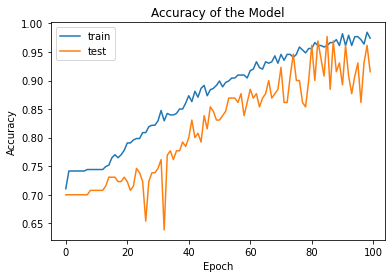

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy of the Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc=u'upper left')
plt.show()

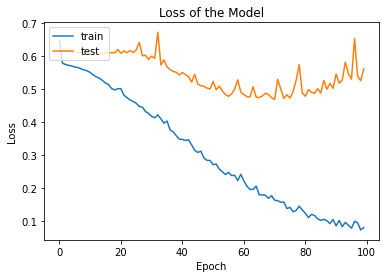

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss of the Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','test'],loc=u'upper left')
plt.show()

## optimum values for hyperparameters

In [25]:
def create_model():
    model = Sequential()
    model.add(Dense(50, input_dim=9, kernel_initializer='normal', activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
    return model

In [26]:
model=KerasClassifier(create_model)
batch_size=[10,50,100]
epochs=[50,100]
param_grid=dict(batch_size=batch_size,epochs=epochs)
gridsearchcv=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)
gridsearchcv.fit(X,Y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START batch_size=10, epochs=50....................................
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                500       
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 1,801
Trainable params: 1,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50


C:\Users\Rahul\AppData\Local\Temp/ipykernel_20536/726639536.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=KerasClassifier(create_model)


42/42 [==============================] - 1s 1ms/step - loss: 0.6559 - accuracy: 0.6634
Epoch 2/50
42/42 [==============================] - 0s 1ms/step - loss: 0.6383 - accuracy: 0.6634
Epoch 3/50
42/42 [==============================] - 0s 1ms/step - loss: 0.6352 - accuracy: 0.6634
Epoch 4/50
42/42 [==============================] - 0s 1ms/step - loss: 0.6341 - accuracy: 0.6634
Epoch 5/50
42/42 [==============================] - 0s 1ms/step - loss: 0.6310 - accuracy: 0.6634
Epoch 6/50
42/42 [==============================] - 0s 1ms/step - loss: 0.6281 - accuracy: 0.6659
Epoch 7/50
42/42 [==============================] - 0s 1ms/step - loss: 0.6254 - accuracy: 0.6683
Epoch 8/50
42/42 [==============================] - 0s 1ms/step - loss: 0.6205 - accuracy: 0.6683
Epoch 9/50
42/42 [==============================] - 0s 1ms/step - loss: 0.6181 - accuracy: 0.6731
Epoch 10/50
42/42 [==============================] - 0s 1ms/step - loss: 0.6105 - accuracy: 0.6755
Epoch 11/50
42/42 [===========

42/42 [==============================] - 0s 2ms/step - loss: 0.4412 - accuracy: 0.8087
Epoch 24/50
42/42 [==============================] - 0s 2ms/step - loss: 0.4374 - accuracy: 0.8184
Epoch 25/50
42/42 [==============================] - 0s 2ms/step - loss: 0.4125 - accuracy: 0.8329
Epoch 26/50
42/42 [==============================] - 0s 2ms/step - loss: 0.4052 - accuracy: 0.8402
Epoch 27/50
42/42 [==============================] - 0s 2ms/step - loss: 0.4036 - accuracy: 0.8402
Epoch 28/50
42/42 [==============================] - 0s 1ms/step - loss: 0.3831 - accuracy: 0.8547
Epoch 29/50
42/42 [==============================] - 0s 997us/step - loss: 0.3783 - accuracy: 0.8547
Epoch 30/50
42/42 [==============================] - 0s 1ms/step - loss: 0.3612 - accuracy: 0.8620
Epoch 31/50
42/42 [==============================] - 0s 1ms/step - loss: 0.3472 - accuracy: 0.8668
Epoch 32/50
42/42 [==============================] - 0s 1ms/step - loss: 0.3335 - accuracy: 0.8741
Epoch 33/50
42/42 [=

42/42 [==============================] - 0s 963us/step - loss: 0.3804 - accuracy: 0.8357
Epoch 45/50
42/42 [==============================] - 0s 967us/step - loss: 0.3673 - accuracy: 0.8357
Epoch 46/50
42/42 [==============================] - 0s 1ms/step - loss: 0.3667 - accuracy: 0.8430
Epoch 47/50
42/42 [==============================] - 0s 945us/step - loss: 0.3519 - accuracy: 0.8430
Epoch 48/50
42/42 [==============================] - 0s 1ms/step - loss: 0.3522 - accuracy: 0.8527
Epoch 49/50
42/42 [==============================] - 0s 1ms/step - loss: 0.3419 - accuracy: 0.8502
Epoch 50/50
11/11 [==============================] - 0s 997us/step - loss: 0.4713 - accuracy: 0.7864
[CV 3/5; 1/6] END .....batch_size=10, epochs=50;, score=0.786 total time=   3.2s
[CV 4/5; 1/6] START batch_size=10, epochs=50....................................
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param 

42/42 [==============================] - 0s 2ms/step - loss: 0.5704 - accuracy: 0.7391
Epoch 6/50
42/42 [==============================] - 0s 2ms/step - loss: 0.5671 - accuracy: 0.7391
Epoch 7/50
42/42 [==============================] - 0s 2ms/step - loss: 0.5650 - accuracy: 0.7391
Epoch 8/50
42/42 [==============================] - 0s 1ms/step - loss: 0.5609 - accuracy: 0.7415
Epoch 9/50
42/42 [==============================] - 0s 1ms/step - loss: 0.5604 - accuracy: 0.7415
Epoch 10/50
42/42 [==============================] - 0s 1ms/step - loss: 0.5550 - accuracy: 0.7415
Epoch 11/50
42/42 [==============================] - 0s 1ms/step - loss: 0.5561 - accuracy: 0.7415
Epoch 12/50
42/42 [==============================] - 0s 1ms/step - loss: 0.5477 - accuracy: 0.7415
Epoch 13/50
42/42 [==============================] - 0s 973us/step - loss: 0.5359 - accuracy: 0.7440
Epoch 14/50
42/42 [==============================] - 0s 1ms/step - loss: 0.5283 - accuracy: 0.7536
Epoch 15/50
42/42 [=====

42/42 [==============================] - 0s 1ms/step - loss: 0.5156 - accuracy: 0.7724
Epoch 27/100
42/42 [==============================] - 0s 1ms/step - loss: 0.5083 - accuracy: 0.7845
Epoch 28/100
42/42 [==============================] - 0s 1ms/step - loss: 0.4822 - accuracy: 0.7893
Epoch 29/100
42/42 [==============================] - 0s 1ms/step - loss: 0.4732 - accuracy: 0.7942
Epoch 30/100
42/42 [==============================] - 0s 959us/step - loss: 0.4753 - accuracy: 0.8015
Epoch 31/100
42/42 [==============================] - 0s 1ms/step - loss: 0.4766 - accuracy: 0.7918
Epoch 32/100
42/42 [==============================] - 0s 1ms/step - loss: 0.4389 - accuracy: 0.8208
Epoch 33/100
42/42 [==============================] - 0s 1ms/step - loss: 0.4328 - accuracy: 0.8111
Epoch 34/100
42/42 [==============================] - 0s 1ms/step - loss: 0.4194 - accuracy: 0.8281
Epoch 35/100
42/42 [==============================] - 0s 1ms/step - loss: 0.4229 - accuracy: 0.8184
Epoch 36/10

 dense_23 (Dense)            (None, 1)                 26        
                                                                 
Total params: 1,801
Trainable params: 1,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
42/42 [==============================] - 0s 1ms/step - loss: 0.6323 - accuracy: 0.7240
Epoch 2/100
42/42 [==============================] - 0s 1ms/step - loss: 0.5886 - accuracy: 0.7264
Epoch 3/100
42/42 [==============================] - 0s 1ms/step - loss: 0.5860 - accuracy: 0.7264
Epoch 4/100
42/42 [==============================] - 0s 964us/step - loss: 0.5832 - accuracy: 0.7264
Epoch 5/100
42/42 [==============================] - 0s 1ms/step - loss: 0.5795 - accuracy: 0.7264
Epoch 6/100
42/42 [==============================] - 0s 1ms/step - loss: 0.5767 - accuracy: 0.7288
Epoch 7/100
42/42 [==============================] - 0s 997us/step - loss: 0.5743 - accuracy: 0.7288
Epoch 8/100
42/42 [==================

42/42 [==============================] - 0s 997us/step - loss: 0.0907 - accuracy: 0.9709
Epoch 80/100
42/42 [==============================] - 0s 973us/step - loss: 0.0897 - accuracy: 0.9734
Epoch 81/100
42/42 [==============================] - 0s 973us/step - loss: 0.0901 - accuracy: 0.9661
Epoch 82/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0857 - accuracy: 0.9685
Epoch 83/100
42/42 [==============================] - 0s 949us/step - loss: 0.0873 - accuracy: 0.9734
Epoch 84/100
42/42 [==============================] - 0s 949us/step - loss: 0.0912 - accuracy: 0.9831
Epoch 85/100
42/42 [==============================] - 0s 949us/step - loss: 0.0861 - accuracy: 0.9661
Epoch 86/100
42/42 [==============================] - 0s 995us/step - loss: 0.0813 - accuracy: 0.9685
Epoch 87/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0808 - accuracy: 0.9734
Epoch 88/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0985 - accuracy: 0.9637

42/42 [==============================] - 0s 968us/step - loss: 0.3142 - accuracy: 0.8599
Epoch 51/100
42/42 [==============================] - 0s 949us/step - loss: 0.3066 - accuracy: 0.8671
Epoch 52/100
42/42 [==============================] - 0s 1ms/step - loss: 0.2921 - accuracy: 0.8647
Epoch 53/100
42/42 [==============================] - 0s 1ms/step - loss: 0.2994 - accuracy: 0.8961
Epoch 54/100
42/42 [==============================] - 0s 1ms/step - loss: 0.2795 - accuracy: 0.8647
Epoch 55/100
42/42 [==============================] - 0s 1ms/step - loss: 0.2730 - accuracy: 0.8816
Epoch 56/100
42/42 [==============================] - 0s 1ms/step - loss: 0.2665 - accuracy: 0.8816
Epoch 57/100
42/42 [==============================] - 0s 1ms/step - loss: 0.2517 - accuracy: 0.8889
Epoch 58/100
42/42 [==============================] - 0s 1ms/step - loss: 0.2483 - accuracy: 0.8961
Epoch 59/100
42/42 [==============================] - 0s 1ms/step - loss: 0.2471 - accuracy: 0.8937
Epoch 60/

42/42 [==============================] - 0s 950us/step - loss: 0.4580 - accuracy: 0.7995
Epoch 22/100
42/42 [==============================] - 0s 1ms/step - loss: 0.4423 - accuracy: 0.8116
Epoch 23/100
42/42 [==============================] - 0s 1ms/step - loss: 0.4339 - accuracy: 0.8164
Epoch 24/100
42/42 [==============================] - 0s 1ms/step - loss: 0.4240 - accuracy: 0.8237
Epoch 25/100
42/42 [==============================] - 0s 1ms/step - loss: 0.4298 - accuracy: 0.8213
Epoch 26/100
42/42 [==============================] - 0s 1ms/step - loss: 0.4162 - accuracy: 0.8430
Epoch 27/100
42/42 [==============================] - 0s 2ms/step - loss: 0.3820 - accuracy: 0.8430
Epoch 28/100
42/42 [==============================] - 0s 2ms/step - loss: 0.3879 - accuracy: 0.8454
Epoch 29/100
42/42 [==============================] - 0s 1ms/step - loss: 0.3686 - accuracy: 0.8575
Epoch 30/100
42/42 [==============================] - 0s 1ms/step - loss: 0.3495 - accuracy: 0.8599
Epoch 31/10

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 50)                500       
                                                                 
 dense_31 (Dense)            (None, 25)                1275      
                                                                 
 dense_32 (Dense)            (None, 1)                 26        
                                                                 
Total params: 1,801
Trainable params: 1,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
42/42 [==============================] - 0s 2ms/step - loss: 0.6361 - accuracy: 0.7246
Epoch 2/100
42/42 [==============================] - 0s 2ms/step - loss: 0.5760 - accuracy: 0.7391
Epoch 3/100
42/42 [==============================] - 0s 2ms/step - loss: 0.5754 - accuracy: 0.7391
Epoch 4/100
42/42 [======================

42/42 [==============================] - 0s 1ms/step - loss: 0.1206 - accuracy: 0.9710
Epoch 75/100
42/42 [==============================] - 0s 1ms/step - loss: 0.1105 - accuracy: 0.9638
Epoch 76/100
42/42 [==============================] - 0s 1ms/step - loss: 0.1541 - accuracy: 0.9493
Epoch 77/100
42/42 [==============================] - 0s 1ms/step - loss: 0.1394 - accuracy: 0.9420
Epoch 78/100
42/42 [==============================] - 0s 1ms/step - loss: 0.1114 - accuracy: 0.9662
Epoch 79/100
42/42 [==============================] - 0s 1ms/step - loss: 0.1038 - accuracy: 0.9686
Epoch 80/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0954 - accuracy: 0.9686
Epoch 81/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0936 - accuracy: 0.9783
Epoch 82/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0939 - accuracy: 0.9734
Epoch 83/100
42/42 [==============================] - 0s 1ms/step - loss: 0.1017 - accuracy: 0.9638
Epoch 84/100


9/9 [==============================] - 0s 1ms/step - loss: 0.5366 - accuracy: 0.7409
Epoch 47/50
9/9 [==============================] - 0s 1ms/step - loss: 0.5356 - accuracy: 0.7409
Epoch 48/50
9/9 [==============================] - 0s 1ms/step - loss: 0.5294 - accuracy: 0.7433
Epoch 49/50
9/9 [==============================] - 0s 1ms/step - loss: 0.5271 - accuracy: 0.7530
Epoch 50/50
3/3 [==============================] - 0s 1ms/step - loss: 0.3198 - accuracy: 1.0000
[CV 1/5; 3/6] END .....batch_size=50, epochs=50;, score=1.000 total time=   1.2s
[CV 2/5; 3/6] START batch_size=50, epochs=50....................................
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 50)                500       
                                                                 
 dense_37 (Dense)            (None, 25)                1275      
            

9/9 [==============================] - 0s 1ms/step - loss: 0.5299 - accuracy: 0.7826
Epoch 9/50
9/9 [==============================] - 0s 1ms/step - loss: 0.5294 - accuracy: 0.7826
Epoch 10/50
9/9 [==============================] - 0s 1ms/step - loss: 0.5284 - accuracy: 0.7826
Epoch 11/50
9/9 [==============================] - 0s 1ms/step - loss: 0.5278 - accuracy: 0.7826
Epoch 12/50
9/9 [==============================] - 0s 1ms/step - loss: 0.5274 - accuracy: 0.7826
Epoch 13/50
9/9 [==============================] - 0s 1ms/step - loss: 0.5266 - accuracy: 0.7826
Epoch 14/50
9/9 [==============================] - 0s 1ms/step - loss: 0.5260 - accuracy: 0.7826
Epoch 15/50
9/9 [==============================] - 0s 1ms/step - loss: 0.5256 - accuracy: 0.7826
Epoch 16/50
9/9 [==============================] - 0s 1ms/step - loss: 0.5248 - accuracy: 0.7826
Epoch 17/50
9/9 [==============================] - 0s 1ms/step - loss: 0.5244 - accuracy: 0.7826
Epoch 18/50
9/9 [==========================

9/9 [==============================] - 0s 1ms/step - loss: 0.5297 - accuracy: 0.7488
Epoch 32/50
9/9 [==============================] - 0s 1ms/step - loss: 0.5272 - accuracy: 0.7488
Epoch 33/50
9/9 [==============================] - 0s 1ms/step - loss: 0.5281 - accuracy: 0.7633
Epoch 34/50
9/9 [==============================] - 0s 2ms/step - loss: 0.5214 - accuracy: 0.7585
Epoch 35/50
9/9 [==============================] - 0s 1ms/step - loss: 0.5241 - accuracy: 0.7633
Epoch 36/50
9/9 [==============================] - 0s 1ms/step - loss: 0.5150 - accuracy: 0.7657
Epoch 37/50
9/9 [==============================] - 0s 1ms/step - loss: 0.5115 - accuracy: 0.7657
Epoch 38/50
9/9 [==============================] - 0s 1ms/step - loss: 0.5113 - accuracy: 0.7681
Epoch 39/50
9/9 [==============================] - 0s 1ms/step - loss: 0.5044 - accuracy: 0.7657
Epoch 40/50
9/9 [==============================] - 0s 2ms/step - loss: 0.5026 - accuracy: 0.7657
Epoch 41/50
9/9 [=========================

9/9 [==============================] - 0s 1ms/step - loss: 0.4934 - accuracy: 0.7802
Epoch 48/50
9/9 [==============================] - 0s 1ms/step - loss: 0.4962 - accuracy: 0.7729
Epoch 49/50
9/9 [==============================] - 0s 1ms/step - loss: 0.4931 - accuracy: 0.7899
Epoch 50/50
3/3 [==============================] - 0s 2ms/step - loss: 0.6245 - accuracy: 0.7282
[CV 5/5; 3/6] END .....batch_size=50, epochs=50;, score=0.728 total time=   1.3s
[CV 1/5; 4/6] START batch_size=50, epochs=100...................................
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 50)                500       
                                                                 
 dense_49 (Dense)            (None, 25)                1275      
                                                                 
 dense_50 (Dense)            (None, 1)     

9/9 [==============================] - 0s 1ms/step - loss: 0.4829 - accuracy: 0.7748
Epoch 63/100
9/9 [==============================] - 0s 2ms/step - loss: 0.4771 - accuracy: 0.8136
Epoch 64/100
9/9 [==============================] - 0s 1ms/step - loss: 0.4683 - accuracy: 0.7821
Epoch 65/100
9/9 [==============================] - 0s 1ms/step - loss: 0.4680 - accuracy: 0.8232
Epoch 66/100
9/9 [==============================] - 0s 1ms/step - loss: 0.4605 - accuracy: 0.7821
Epoch 67/100
9/9 [==============================] - 0s 1ms/step - loss: 0.4558 - accuracy: 0.8087
Epoch 68/100
9/9 [==============================] - 0s 1ms/step - loss: 0.4499 - accuracy: 0.7942
Epoch 69/100
9/9 [==============================] - 0s 1ms/step - loss: 0.4458 - accuracy: 0.8039
Epoch 70/100
9/9 [==============================] - 0s 1ms/step - loss: 0.4434 - accuracy: 0.8063
Epoch 71/100
9/9 [==============================] - 0s 1ms/step - loss: 0.4429 - accuracy: 0.8426
Epoch 72/100
9/9 [===============

Epoch 35/100
9/9 [==============================] - 0s 1ms/step - loss: 0.5290 - accuracy: 0.7627
Epoch 36/100
9/9 [==============================] - 0s 1ms/step - loss: 0.5261 - accuracy: 0.7603
Epoch 37/100
9/9 [==============================] - 0s 997us/step - loss: 0.5201 - accuracy: 0.7627
Epoch 38/100
9/9 [==============================] - 0s 1ms/step - loss: 0.5189 - accuracy: 0.7627
Epoch 39/100
9/9 [==============================] - 0s 1ms/step - loss: 0.5150 - accuracy: 0.7700
Epoch 40/100
9/9 [==============================] - 0s 1ms/step - loss: 0.5110 - accuracy: 0.7748
Epoch 41/100
9/9 [==============================] - 0s 1ms/step - loss: 0.5100 - accuracy: 0.7627
Epoch 42/100
9/9 [==============================] - 0s 1ms/step - loss: 0.5021 - accuracy: 0.7772
Epoch 43/100
9/9 [==============================] - 0s 1ms/step - loss: 0.4998 - accuracy: 0.7700
Epoch 44/100
9/9 [==============================] - 0s 1ms/step - loss: 0.4985 - accuracy: 0.7845
Epoch 45/100
9/9 [

9/9 [==============================] - 0s 1ms/step - loss: 0.5312 - accuracy: 0.7826
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.5299 - accuracy: 0.7826
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 0.5289 - accuracy: 0.7826
Epoch 10/100
9/9 [==============================] - 0s 1ms/step - loss: 0.5282 - accuracy: 0.7826
Epoch 11/100
9/9 [==============================] - 0s 1ms/step - loss: 0.5273 - accuracy: 0.7826
Epoch 12/100
9/9 [==============================] - 0s 1ms/step - loss: 0.5269 - accuracy: 0.7826
Epoch 13/100
9/9 [==============================] - 0s 1ms/step - loss: 0.5255 - accuracy: 0.7826
Epoch 14/100
9/9 [==============================] - 0s 1ms/step - loss: 0.5242 - accuracy: 0.7826
Epoch 15/100
9/9 [==============================] - 0s 1ms/step - loss: 0.5232 - accuracy: 0.7826
Epoch 16/100
9/9 [==============================] - 0s 1ms/step - loss: 0.5217 - accuracy: 0.7826
Epoch 17/100
9/9 [=================

9/9 [==============================] - 0s 1ms/step - loss: 0.4039 - accuracy: 0.8188
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.3988 - accuracy: 0.8285
Epoch 92/100
9/9 [==============================] - 0s 2ms/step - loss: 0.3977 - accuracy: 0.8237
Epoch 93/100
9/9 [==============================] - 0s 1ms/step - loss: 0.3991 - accuracy: 0.8333
Epoch 94/100
9/9 [==============================] - 0s 1ms/step - loss: 0.3925 - accuracy: 0.8285
Epoch 95/100
9/9 [==============================] - 0s 1ms/step - loss: 0.3899 - accuracy: 0.8261
Epoch 96/100
9/9 [==============================] - 0s 1ms/step - loss: 0.3923 - accuracy: 0.8382
Epoch 97/100
9/9 [==============================] - 0s 1ms/step - loss: 0.3908 - accuracy: 0.8261
Epoch 98/100
9/9 [==============================] - 0s 1ms/step - loss: 0.3849 - accuracy: 0.8454
Epoch 99/100
9/9 [==============================] - 0s 1ms/step - loss: 0.3794 - accuracy: 0.8285
Epoch 100/100
3/3 [==============

Epoch 63/100
9/9 [==============================] - 0s 1ms/step - loss: 0.4485 - accuracy: 0.8357
Epoch 64/100
9/9 [==============================] - 0s 1ms/step - loss: 0.4336 - accuracy: 0.8043
Epoch 65/100
9/9 [==============================] - 0s 1ms/step - loss: 0.4336 - accuracy: 0.8116
Epoch 66/100
9/9 [==============================] - 0s 1ms/step - loss: 0.4227 - accuracy: 0.8092
Epoch 67/100
9/9 [==============================] - 0s 1ms/step - loss: 0.4227 - accuracy: 0.8116
Epoch 68/100
9/9 [==============================] - 0s 1ms/step - loss: 0.4249 - accuracy: 0.8043
Epoch 69/100
9/9 [==============================] - 0s 1ms/step - loss: 0.4207 - accuracy: 0.8406
Epoch 70/100
9/9 [==============================] - 0s 1ms/step - loss: 0.4099 - accuracy: 0.8237
Epoch 71/100
9/9 [==============================] - 0s 2ms/step - loss: 0.4047 - accuracy: 0.8237
Epoch 72/100
9/9 [==============================] - 0s 1ms/step - loss: 0.4058 - accuracy: 0.8309
Epoch 73/100
9/9 [==

9/9 [==============================] - 0s 1ms/step - loss: 0.5249 - accuracy: 0.7609
Epoch 36/100
9/9 [==============================] - 0s 1ms/step - loss: 0.5219 - accuracy: 0.7585
Epoch 37/100
9/9 [==============================] - 0s 1ms/step - loss: 0.5179 - accuracy: 0.7657
Epoch 38/100
9/9 [==============================] - 0s 1ms/step - loss: 0.5137 - accuracy: 0.7705
Epoch 39/100
9/9 [==============================] - 0s 1ms/step - loss: 0.5107 - accuracy: 0.7705
Epoch 40/100
9/9 [==============================] - 0s 2ms/step - loss: 0.5089 - accuracy: 0.7681
Epoch 41/100
9/9 [==============================] - 0s 2ms/step - loss: 0.5101 - accuracy: 0.7705
Epoch 42/100
9/9 [==============================] - 0s 1ms/step - loss: 0.5014 - accuracy: 0.7705
Epoch 43/100
9/9 [==============================] - 0s 1ms/step - loss: 0.5035 - accuracy: 0.7826
Epoch 44/100
9/9 [==============================] - 0s 1ms/step - loss: 0.5020 - accuracy: 0.7705
Epoch 45/100
9/9 [===============

Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.6398 - accuracy: 0.6634
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.6363 - accuracy: 0.6634
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.6351 - accuracy: 0.6634
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.6355 - accuracy: 0.6634
Epoch 12/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6354 - accuracy: 0.6634
Epoch 13/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6350 - accuracy: 0.6634
Epoch 14/50
5/5 [==============================] - 0s 1ms/step - loss: 0.6339 - accuracy: 0.6634
Epoch 15/50
5/5 [==============================] - 0s 1ms/step - loss: 0.6340 - accuracy: 0.6634
Epoch 16/50
5/5 [==============================] - 0s 1ms/step - loss: 0.6335 - accuracy: 0.6634
Epoch 17/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6330 - accuracy: 0.6634
Epoch 18/50
5/5 [===============

5/5 [==============================] - 0s 1ms/step - loss: 0.5773 - accuracy: 0.7264
Epoch 32/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5765 - accuracy: 0.7288
Epoch 33/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5764 - accuracy: 0.7288
Epoch 34/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5756 - accuracy: 0.7288
Epoch 35/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5755 - accuracy: 0.7288
Epoch 36/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5740 - accuracy: 0.7288
Epoch 37/50
5/5 [==============================] - 0s 1ms/step - loss: 0.5728 - accuracy: 0.7288
Epoch 38/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5725 - accuracy: 0.7312
Epoch 39/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5721 - accuracy: 0.7312
Epoch 40/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5706 - accuracy: 0.7312
Epoch 41/50
5/5 [=========================

 dense_72 (Dense)            (None, 50)                500       
                                                                 
 dense_73 (Dense)            (None, 25)                1275      
                                                                 
 dense_74 (Dense)            (None, 1)                 26        
                                                                 
Total params: 1,801
Trainable params: 1,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5217
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6702 - accuracy: 0.7440
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6527 - accuracy: 0.7440
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.6375 - accuracy: 0.7440
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6225 - accurac

5/5 [==============================] - 0s 1ms/step - loss: 0.5719 - accuracy: 0.7391
Epoch 18/50
5/5 [==============================] - 0s 1ms/step - loss: 0.5716 - accuracy: 0.7391
Epoch 19/50
5/5 [==============================] - 0s 1ms/step - loss: 0.5707 - accuracy: 0.7391
Epoch 20/50
5/5 [==============================] - 0s 1ms/step - loss: 0.5705 - accuracy: 0.7391
Epoch 21/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5700 - accuracy: 0.7391
Epoch 22/50
5/5 [==============================] - 0s 1ms/step - loss: 0.5697 - accuracy: 0.7391
Epoch 23/50
5/5 [==============================] - 0s 1ms/step - loss: 0.5691 - accuracy: 0.7391
Epoch 24/50
5/5 [==============================] - 0s 1ms/step - loss: 0.5690 - accuracy: 0.7391
Epoch 25/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5679 - accuracy: 0.7391
Epoch 26/50
5/5 [==============================] - 0s 1ms/step - loss: 0.5665 - accuracy: 0.7391
Epoch 27/50
5/5 [=========================

5/5 [==============================] - 0s 2ms/step - loss: 0.6087 - accuracy: 0.6683
Epoch 41/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6052 - accuracy: 0.6731
Epoch 42/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6027 - accuracy: 0.6828
Epoch 43/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6013 - accuracy: 0.6998
Epoch 44/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5990 - accuracy: 0.6998
Epoch 45/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5970 - accuracy: 0.6925
Epoch 46/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5948 - accuracy: 0.6973
Epoch 47/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5916 - accuracy: 0.7022
Epoch 48/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5894 - accuracy: 0.7046
Epoch 49/100
5/5 [==============================] - 0s 1ms/step - loss: 0.5874 - accuracy: 0.7046
Epoch 50/100
5/5 [===============

Epoch 13/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5852 - accuracy: 0.7264
Epoch 14/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5847 - accuracy: 0.7264
Epoch 15/100
5/5 [==============================] - 0s 1ms/step - loss: 0.5854 - accuracy: 0.7264
Epoch 16/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5851 - accuracy: 0.7264
Epoch 17/100
5/5 [==============================] - 0s 1ms/step - loss: 0.5844 - accuracy: 0.7264
Epoch 18/100
5/5 [==============================] - 0s 1ms/step - loss: 0.5838 - accuracy: 0.7264
Epoch 19/100
5/5 [==============================] - 0s 1ms/step - loss: 0.5831 - accuracy: 0.7264
Epoch 20/100
5/5 [==============================] - 0s 1ms/step - loss: 0.5822 - accuracy: 0.7264
Epoch 21/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5811 - accuracy: 0.7264
Epoch 22/100
5/5 [==============================] - 0s 1ms/step - loss: 0.5804 - accuracy: 0.7264
Epoch 23/100
5/5 [==

5/5 [==============================] - 0s 2ms/step - loss: 0.4597 - accuracy: 0.7893
Epoch 97/100
5/5 [==============================] - 0s 1ms/step - loss: 0.4660 - accuracy: 0.7845
Epoch 98/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4633 - accuracy: 0.8039
Epoch 99/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4599 - accuracy: 0.8039
Epoch 100/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5533 - accuracy: 0.7500
[CV 2/5; 6/6] END ...batch_size=100, epochs=100;, score=0.750 total time=   1.5s
[CV 3/5; 6/6] START batch_size=100, epochs=100..................................
Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 50)                500       
                                                                 
 dense_85 (Dense)            (None, 25)                1275      
       

Epoch 69/100
5/5 [==============================] - 0s 1ms/step - loss: 0.4941 - accuracy: 0.7874
Epoch 70/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4925 - accuracy: 0.7874
Epoch 71/100
5/5 [==============================] - 0s 1ms/step - loss: 0.4924 - accuracy: 0.7947
Epoch 72/100
5/5 [==============================] - 0s 1ms/step - loss: 0.4919 - accuracy: 0.7947
Epoch 73/100
5/5 [==============================] - 0s 1ms/step - loss: 0.4902 - accuracy: 0.7947
Epoch 74/100
5/5 [==============================] - 0s 1ms/step - loss: 0.4902 - accuracy: 0.7899
Epoch 75/100
5/5 [==============================] - 0s 1ms/step - loss: 0.4909 - accuracy: 0.7923
Epoch 76/100
5/5 [==============================] - 0s 1ms/step - loss: 0.4884 - accuracy: 0.7947
Epoch 77/100
5/5 [==============================] - 0s 1ms/step - loss: 0.4879 - accuracy: 0.7947
Epoch 78/100
5/5 [==============================] - 0s 1ms/step - loss: 0.4865 - accuracy: 0.7947
Epoch 79/100
5/5 [==

5/5 [==============================] - 0s 1ms/step - loss: 0.5437 - accuracy: 0.7488
Epoch 42/100
5/5 [==============================] - 0s 1ms/step - loss: 0.5426 - accuracy: 0.7488
Epoch 43/100
5/5 [==============================] - 0s 1ms/step - loss: 0.5417 - accuracy: 0.7488
Epoch 44/100
5/5 [==============================] - 0s 1ms/step - loss: 0.5405 - accuracy: 0.7488
Epoch 45/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5393 - accuracy: 0.7488
Epoch 46/100
5/5 [==============================] - 0s 1ms/step - loss: 0.5380 - accuracy: 0.7488
Epoch 47/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5369 - accuracy: 0.7488
Epoch 48/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5361 - accuracy: 0.7488
Epoch 49/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5340 - accuracy: 0.7488
Epoch 50/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5360 - accuracy: 0.7488
Epoch 51/100
5/5 [===============

Epoch 14/100
5/5 [==============================] - 0s 1ms/step - loss: 0.5732 - accuracy: 0.7391
Epoch 15/100
5/5 [==============================] - 0s 1ms/step - loss: 0.5737 - accuracy: 0.7391
Epoch 16/100
5/5 [==============================] - 0s 1ms/step - loss: 0.5746 - accuracy: 0.7391
Epoch 17/100
5/5 [==============================] - 0s 1ms/step - loss: 0.5732 - accuracy: 0.7391
Epoch 18/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5725 - accuracy: 0.7391
Epoch 19/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5707 - accuracy: 0.7391
Epoch 20/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5706 - accuracy: 0.7391
Epoch 21/100
5/5 [==============================] - 0s 1ms/step - loss: 0.5700 - accuracy: 0.7391
Epoch 22/100
5/5 [==============================] - 0s 1ms/step - loss: 0.5692 - accuracy: 0.7391
Epoch 23/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5682 - accuracy: 0.7391
Epoch 24/100
5/5 [==

5/5 [==============================] - 0s 2ms/step - loss: 0.4571 - accuracy: 0.7923
Epoch 98/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4521 - accuracy: 0.7995
Epoch 99/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4511 - accuracy: 0.8019
Epoch 100/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6153 - accuracy: 0.7476
[CV 5/5; 6/6] END ...batch_size=100, epochs=100;, score=0.748 total time=   1.5s
Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_93 (Dense)            (None, 50)                500       
                                                                 
 dense_94 (Dense)            (None, 25)                1275      
                                                                 
 dense_95 (Dense)            (None, 1)                 26        
                                                      

52/52 [==============================] - 0s 1ms/step - loss: 0.0935 - accuracy: 0.9555
Epoch 70/100
52/52 [==============================] - 0s 1ms/step - loss: 0.0811 - accuracy: 0.9826
Epoch 71/100
52/52 [==============================] - 0s 1ms/step - loss: 0.0753 - accuracy: 0.9787
Epoch 72/100
52/52 [==============================] - 0s 1ms/step - loss: 0.1097 - accuracy: 0.9574
Epoch 73/100
52/52 [==============================] - 0s 1ms/step - loss: 0.0892 - accuracy: 0.9652
Epoch 74/100
52/52 [==============================] - 0s 1ms/step - loss: 0.0763 - accuracy: 0.9749
Epoch 75/100
52/52 [==============================] - 0s 1ms/step - loss: 0.0692 - accuracy: 0.9768
Epoch 76/100
52/52 [==============================] - 0s 1ms/step - loss: 0.0691 - accuracy: 0.9826
Epoch 77/100
52/52 [==============================] - 0s 1ms/step - loss: 0.0686 - accuracy: 0.9826
Epoch 78/100
52/52 [==============================] - 0s 1ms/step - loss: 0.0891 - accuracy: 0.9574
Epoch 79/100


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x00000200D01257C0>,
             param_grid={'batch_size': [10, 50, 100], 'epochs': [50, 100]},
             verbose=10)

In [27]:
gridsearchcv.best_params_

{'batch_size': 10, 'epochs': 100}

## These parameters has been used to build the model